# Final Project - Predicting Wine Quality using PyCaret

## Installing requirements and fetching data

In [91]:
!pip install pycaret
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

# some references were taken from https://www.kaggle.com/code/ivelinaterziivanova/predicting-wine-quality-with-pycaret/notebook 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports and Dataframe

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/Iris)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

In [92]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pycaret.utils import enable_colab

enable_colab()
df = pd.read_csv("winequality-white.csv", sep=";")

Colab mode enabled.


In [93]:
df.shape

(4898, 12)

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Feature Engineering

### Changing Quality to Categorical and Lowering to Buckets

In [95]:
df['quality'] = pd.cut(df['quality'], bins = [0, 5.5, 7.5, 10], labels = [0, 1, 2]).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 426.0 KB


In [96]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


### Checking for Missing Values

In [97]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Total'])
missing['%'] = (missing['Total']/df.shape[0])*100
missing.sort_values(by='%', ascending=False)

,Total,%
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


### Checking for Outliers

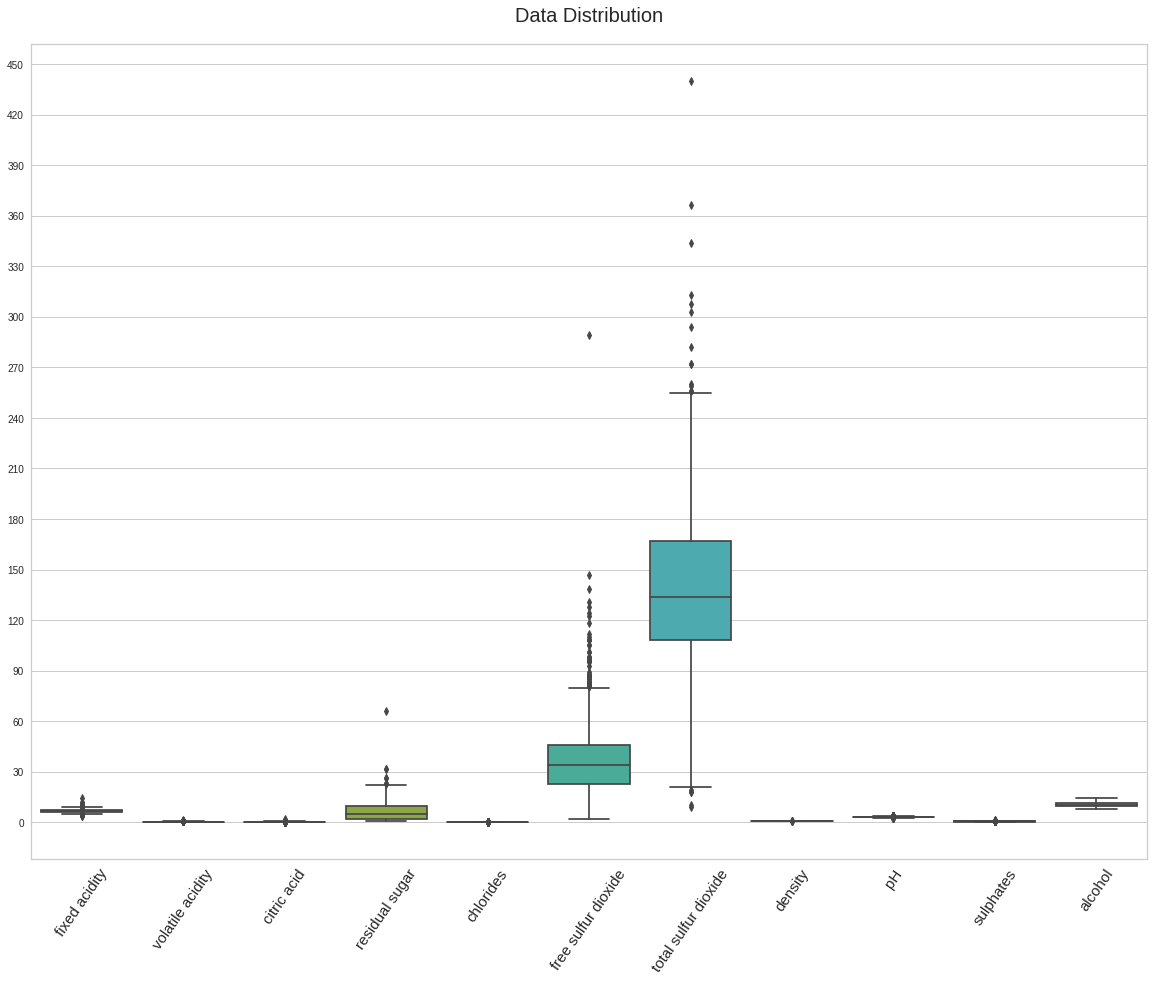

In [99]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

### Removing Outliers

In [100]:
cols = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
shape_before = df.shape[0]
for c in cols:
    upper_level = df[c].mean() + 3*df[c].std()
    lower_level = df[c].mean() - 3*df[c].std()
    df = df[(df[c] > lower_level) & (df[c] < upper_level)]

In [101]:
print('Number of rows in the dataset after the rows with outlier values were removed: {}.\n{} rows were removed.'
      .format(df.shape[0], shape_before-df.shape[0]))

Number of rows in the dataset after the rows with outlier values were removed: 4849.
49 rows were removed.


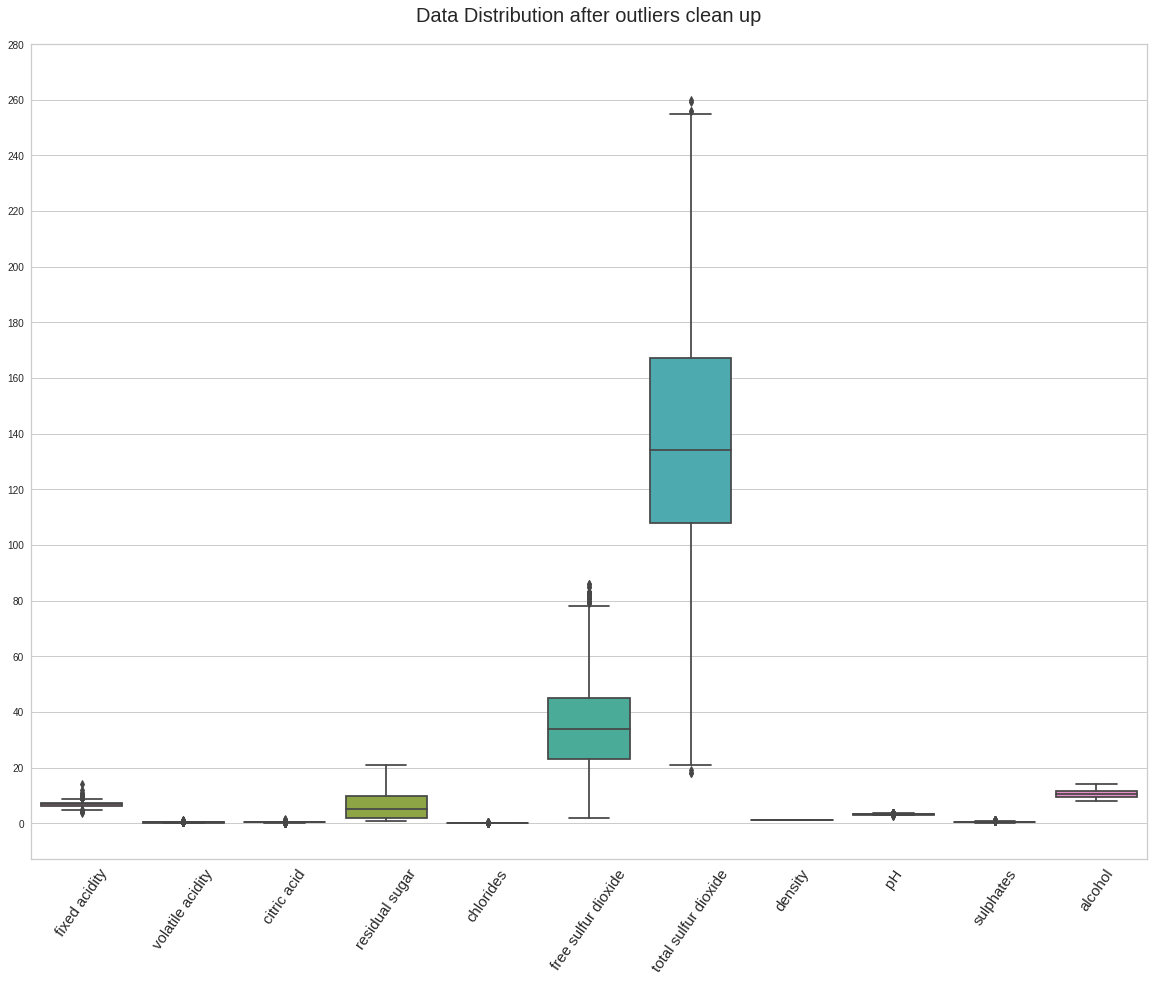

In [102]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,300,20))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution after outliers clean up', size=20, y=1.02)
plt.show()

In order to demonstrate the `predict_model()` function on unseen data, a sample of 15 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 15 records were not available at the time when the machine learning experiment was performed.

## Setting up the Environment in PyCaret

In [103]:
from pycaret.classification import *
wine_env = setup(data = df, target = 'quality', session_id=123) 

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(4849, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

## Comparing Models

In [104]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7982,0.8731,0.6347,0.8008,0.7908,0.5652,0.5714,1.246
rf,Random Forest Classifier,0.7967,0.8665,0.6339,0.8008,0.7894,0.5622,0.5684,1.188
lightgbm,Light Gradient Boosting Machine,0.7891,0.8450,0.6309,0.7907,0.7828,0.5501,0.5542,0.276
gbc,Gradient Boosting Classifier,0.7590,0.8156,0.5440,0.7532,0.7450,0.4717,0.4803,2.961
dt,Decision Tree Classifier,0.7186,0.7139,0.6131,0.7214,0.7193,0.4303,0.4309,0.033
ridge,Ridge Classifier,0.7139,0.0000,0.4494,0.6839,0.6844,0.3420,0.3634,0.016
lda,Linear Discriminant Analysis,0.7127,0.7592,0.4531,0.6811,0.6866,0.3480,0.3638,0.026
lr,Logistic Regression,0.7119,0.7558,0.4519,0.6803,0.6853,0.3454,0.3616,1.362
qda,Quadratic Discriminant Analysis,0.6948,0.7396,0.4709,0.6812,0.6769,0.3233,0.3342,0.035
ada,Ada Boost Classifier,0.6894,0.5437,0.4729,0.6771,0.6791,0.3383,0.3410,0.415


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


As seen above **Extra Tree** and **Random Forest** classifiers are the best performers

## Extra Tree Classifier

creating model

In [157]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8118,0.8612,0.6135,0.8093,0.8030,0.5951,0.6005
1,0.7824,0.8589,0.6095,0.7860,0.7733,0.5265,0.5345
2,0.7971,0.8866,0.5705,0.8051,0.7827,0.5508,0.5645
3,0.7882,0.8596,0.6154,0.7914,0.7798,0.5419,0.5483
4,0.7994,0.8901,0.7087,0.7997,0.7953,0.5706,0.5749
5,0.8053,0.8628,0.6317,0.8099,0.7966,0.5728,0.5831
6,0.8289,0.8987,0.6553,0.8324,0.8223,0.6303,0.6360
7,0.7876,0.8870,0.6504,0.7876,0.7843,0.5571,0.5579
8,0.7729,0.8534,0.6349,0.7761,0.7686,0.5192,0.5209


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 25
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [158]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


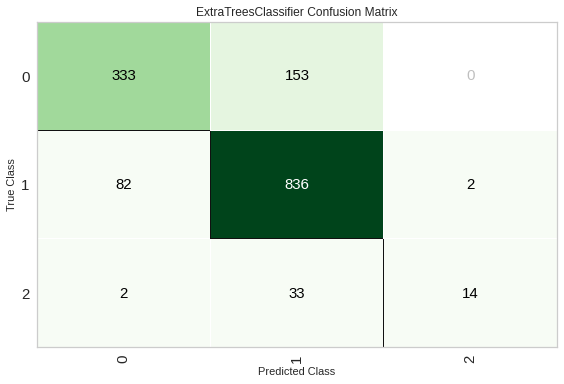

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [159]:
plot_model(et, plot = 'confusion_matrix')

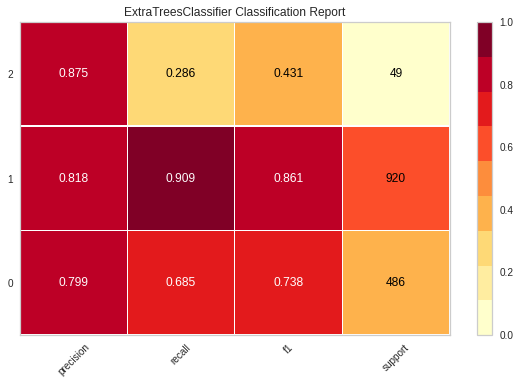

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [160]:
plot_model(et, plot = 'class_report')

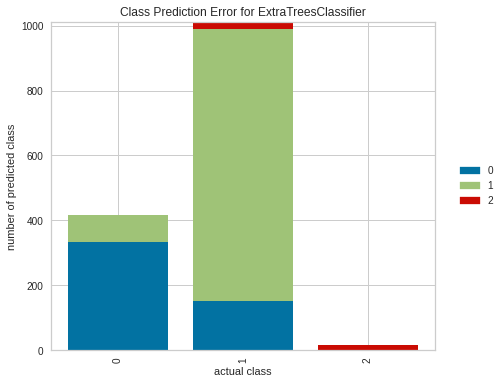

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [161]:
plot_model(et, plot = 'error')

In [162]:
predict_model(et)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8131,0.8983,0.6265,0.8134,0.8053,0.5934,0.5998


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.8,0.23,0.29,15.40,0.073,56.0,173.0,0.99840,3.06,0.41,8.70,1,1,1.00
1,6.4,0.30,0.45,3.50,0.197,76.0,180.0,0.99420,3.02,0.39,9.10,1,0,0.95
2,7.3,0.28,0.54,12.90,0.049,62.0,162.5,0.99840,3.06,0.45,9.10,1,1,1.00
3,9.2,0.25,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.30,1,1,1.00
4,6.9,0.30,0.30,10.55,0.037,4.0,28.0,0.99184,3.07,0.32,12.70,1,1,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,6.3,0.41,0.33,4.70,0.023,28.0,110.0,0.99100,3.30,0.38,12.50,1,1,0.84
1451,7.2,0.18,0.41,1.20,0.048,41.0,97.0,0.99190,3.14,0.45,10.40,0,1,0.48
1452,7.2,0.16,0.49,1.30,0.037,27.0,104.0,0.99240,3.23,0.57,10.60,1,1,0.85
1453,8.2,0.30,0.44,12.40,0.043,52.0,154.0,0.99452,3.04,0.33,12.00,1,1,1.00


Prediction on test is at 81% which is very close to model performance on train set.

## Random Forest Classifier

In [163]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7941,0.8644,0.5972,0.7987,0.7841,0.5530,0.5601
1,0.7735,0.8496,0.6090,0.7768,0.7667,0.5156,0.5191
2,0.8000,0.8732,0.5693,0.8108,0.7843,0.5530,0.5717
3,0.7765,0.8480,0.6078,0.7792,0.7685,0.5183,0.5234
4,0.7965,0.8638,0.7141,0.7979,0.7949,0.5731,0.5740
5,0.7906,0.8598,0.6198,0.7945,0.7812,0.5396,0.5500
6,0.8407,0.9078,0.6630,0.8450,0.8339,0.6545,0.6617
7,0.8171,0.8937,0.6730,0.8208,0.8136,0.6180,0.6190
8,0.7699,0.8470,0.6305,0.7725,0.7650,0.5102,0.5127


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 27
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [164]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


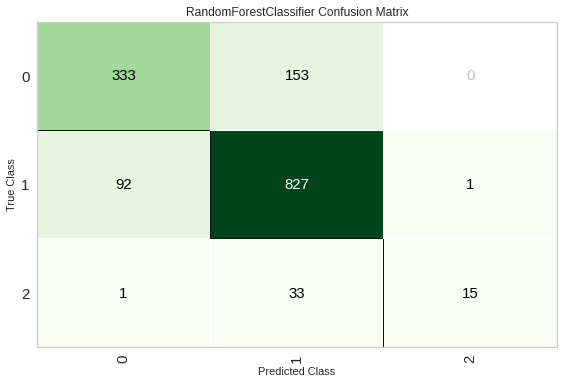

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [165]:
plot_model(rf, plot = 'confusion_matrix')

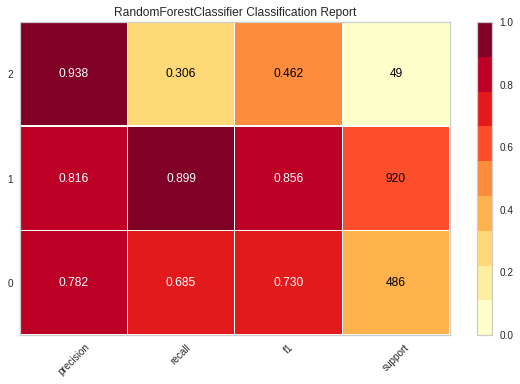

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [166]:
plot_model(rf, plot = 'class_report')

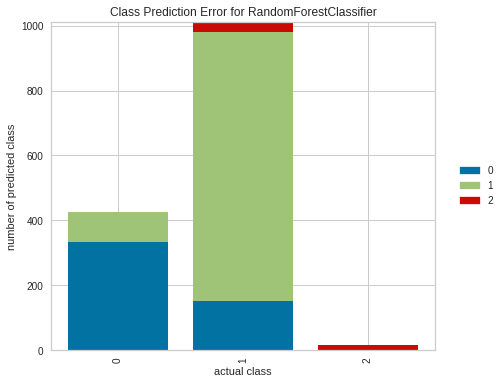

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [167]:
plot_model(rf, plot = 'error')

In [168]:
predict_model(rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8076,0.884,0.6301,0.8089,0.8005,0.5831,0.5883


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.8,0.23,0.29,15.40,0.073,56.0,173.0,0.99840,3.06,0.41,8.70,1,1,0.85
1,6.4,0.30,0.45,3.50,0.197,76.0,180.0,0.99420,3.02,0.39,9.10,1,0,0.85
2,7.3,0.28,0.54,12.90,0.049,62.0,162.5,0.99840,3.06,0.45,9.10,1,1,0.90
3,9.2,0.25,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.30,1,1,0.84
4,6.9,0.30,0.30,10.55,0.037,4.0,28.0,0.99184,3.07,0.32,12.70,1,0,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,6.3,0.41,0.33,4.70,0.023,28.0,110.0,0.99100,3.30,0.38,12.50,1,1,0.93
1451,7.2,0.18,0.41,1.20,0.048,41.0,97.0,0.99190,3.14,0.45,10.40,0,1,0.66
1452,7.2,0.16,0.49,1.30,0.037,27.0,104.0,0.99240,3.23,0.57,10.60,1,1,0.84
1453,8.2,0.30,0.44,12.40,0.043,52.0,154.0,0.99452,3.04,0.33,12.00,1,1,0.84


Prediction is around 81% which is very close to train set performance.